In [98]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sets the theme of the charts
plt.style.use('seaborn-darkgrid')

%matplotlib inline

C:\Users\josha\AppData\Local\Temp\ipykernel_20620\3350495180.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
#Loading the three datasets
charts_df = pd.read_csv('ph_spotify_daily_charts.csv')
charts_artists_df = pd.read_csv('ph_spotify_daily_charts_artists.csv')
charts_tracks_df = pd.read_csv('ph_spotify_daily_charts_tracks.csv')


## Dataset Description

This notebook will be utilizing the dataset called "Spotify Daily Top 200 Tracks in the Philippines".
It contains information about the Daily Top 200 most streamed songs on Spotify from January 1, 2017 until March 31, 2023. 

The entire dataset is seperated into three files.

The **first file** contains data about the tracks that made it to the Top 200 for a specific day. The following are descriptions of each variable in the dataset. 
- **`date`**: the exact date the track is in the Daily Top 200 Chart.
- **`position`**: the position of the track based on the number of streams. Values are limited in the range of 1 to 200.
- **`track_id`**: the unique identifier Spotify uses to identify the songs on their platform. They can be specifically used this way: "https://open.spotify.com/track/<track_id>"
- **`track_name`**: the name of the track/song
- **`artist`**: the name of the artist who made the track/song
- **`streams`**: number of times the song was played

The file was loaded in the code blocks below. It contains *456200* observations, each observation representing a track that was part of the Daily Top 200 Chart for a specific day. It means that it can contain multiple instances for the same track, given that it belongs to the Top 200 Charts for a different date.

In [3]:
charts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456201 entries, 0 to 456200
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        456201 non-null  object
 1   position    456201 non-null  int64 
 2   track_id    456201 non-null  object
 3   track_name  456191 non-null  object
 4   artist      456191 non-null  object
 5   streams     456201 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 20.9+ MB


In [4]:
#Top 5 songs for January 1st, 2017
charts_df.head(5)

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


The **second file** contains information about the artists who made the songs that reached the Daily Top 200 Charts. The following are descriptions of each variable in the dataset.
- **`artist_id`**: the unique identifier Spotify uses to identify the artists on their platform.
- **`artist_name`**: the name of the artist
- **`total_followers`**: the number of followers the artist had on the time of recording the data
- **`genres`**: an array containing the genres the artist is associated with (if any). [Source](https://developer.spotify.com/documentation/web-api/reference/get-an-artist)
- **`popularity`**: an integer between 0 being the lowest to 100 being the highest, representing the popularity of the artist calculated from all of their tracks.

The code blocks below show that there are *988* observations for this file, each observation representing a unique artist whose tracks made it into the Daily Top 200 Charts atleast once.

In [5]:
charts_artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist_id        988 non-null    object
 1   artist_name      988 non-null    object
 2   total_followers  988 non-null    int64 
 3   genres           988 non-null    object
 4   popularity       988 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 38.7+ KB


In [6]:
#First 5 artists in the dataset
charts_artists_df.head(5)

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,47387027,"['dance pop', 'pop']",89
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,11471232,"['pop', 'talent show', 'uk pop']",82
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,20036566,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",81
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,40125006,['pop'],86
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,8535540,"['dance pop', 'pop', 'post-teen pop']",73


The **third file** contains data about the speicfic details about the tracks listed in the **first file**. The following are descriptions of each variable in the dataset.
- **`track_id`**: the unique identifier Spotify uses to identify the songs on their platform. They can be specifically used this way: "https://open.spotify.com/track/<track_id>". Identical to their respective observations in the **first file**
- **`track_name`**: the name of the track/song. Identical to their respective observations in the **first file**
- **`artist_id`**: the unique identifier Spotify uses to identify the artists on their platform. Identical to their respective observations in the **second file**
- **`artist_name`**: the name of the artist. Identical to their respective observations in the **second file**
- **`album_id`**: the unique identifier Spotify uses for the album that contains the track/song (if any). [Source](https://developer.spotify.com/documentation/web-api/reference/get-an-album)
- **`duration`**: the duration of the song in milliseconds
- **`release_date`**: the date the album containing the track/song was released
- **`popularity`**: the popularity of the album represented as an integer between 0 being the lowest to 100 being the highest
- **`danceability`**: describes how suitable a song is for dancing based on musical elements present in the track specifically the tempo, rhythm stability, beat strength, and overall regularity. It has a value between 0 being the least danceable to 1 being the most danceable.
- **`energy`**: a value between 0 to 1 representing the measure of intensity and activity.
- **`key`**: a value ranging from -1 to -11 representing the key the track is in using Standard Pitch Class Notation. e.g. 0 = C, 1 = C#/Db, and so on.
- **`loudness`**: overall (average) loudness of a track in decibels. Values typically range between -60 to 0 db
- **`mode`**: a value of either 0 or 1 indicating the modality of a track, 0 represents *minor* and 1 represents *major*
- **`speechiness`**: a value representing the presence of spoken words detected in a track. It ranges between 0 to 1 where tracks that are exclusively speech-like has a value that is closer to 1.0
- **`acousticness`**: a value between 0 to 1 representing the confidence that the track is acoustic. 1.0 represents high confidence that the track is acoustic
- **`instrumentalness`**: a value between 0 to 1 representing a prediction whether the track has no vocals. The closer the value is to 1.0, the greater likelihood that it has no vocal content.
- **`liveness`**: a value between 0 to 1 representing the presence of an audience detected in the recording. A value above 0.8 provides a strong likelihood that the track is live (performed and recorded in front of an audience).
- **`valence`**: a value between 0 to 1 representing the positiveness conveyed by a track. A value closer to 1.0 represents a positive track (e.g. happy or cheerful) and a value closer to 0.0 represents a negative track (e.g. sad or depressing)
- **`tempo`**: a value representing the overall tempo (speed or pace) of a track in beats per minute (BPM). [Source](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

The code blocks below show that the file contains *4768* observations, each observation representing a unique track that was in the Daily Top 200 Charts atleast once.

In [7]:
charts_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4768 non-null   object 
 1   track_name        4763 non-null   object 
 2   artist_id         4768 non-null   object 
 3   artist_name       4763 non-null   object 
 4   album_id          4768 non-null   object 
 5   duration          4768 non-null   int64  
 6   release_date      4768 non-null   object 
 7   popularity        4768 non-null   int64  
 8   danceability      4767 non-null   float64
 9   energy            4767 non-null   float64
 10  key               4767 non-null   float64
 11  loudness          4767 non-null   float64
 12  mode              4767 non-null   float64
 13  speechiness       4767 non-null   float64
 14  acousticness      4767 non-null   float64
 15  instrumentalness  4767 non-null   float64
 16  liveness          4767 non-null   float64


In [8]:
charts_tracks_df.head(5)

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,75,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,87,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


# Data Cleaning

In this dataset, the variables that will be used in the Exploratory Data Analysis are the following:


In [28]:
pd.set_option('display.max_rows', None)
charts_df["track_name"].value_counts().sort_index()

'Di Lahat                                                                                                               35
'Di Na Babalik                                                                                                         386
'Di Na Muli                                                                                                            782
'bout you                                                                                                                4
(Everything I Do) I Do It For You                                                                                        1
(Not) The One                                                                                                           35
(what i wish just one person would say to me)                                                                            7
...Ready For It?                                                                                                       124
00:00 (Zero O’Cl

![Alt text](image.png)

![Alt text](image-1.png)

![Alt text](image-9.png)

IGNORE FIRST ONE
![Alt text](image-10.png)

![Alt text](image-13.png)

What is Love 

What is Love? 

The Way I Are (Dance with Somebody) (feat. Lil Wayne) - Spotify Version

The Way I Are (Dance with Somebody) [feat. Lil Wayne]  

Tag-Ulan - From "Luck At First Sight"  

Tag-ulan (Original Soundtrack of "Luck At First Sight")    

# Exploratory Data Analysis

After performing data cleaning on the necessary variables needed, 4 prepared EDA questions can now be answered using the provided dataset.

## Question 1
### Which artist was the most prevalent during the timespan of recording this dataset?

To answer this question, an EDA will be conducted, determining the mode artist of the entire dataset inside `ph_spotify_daily_charts.csv`

In [49]:
mode_30_df = charts_df['artist'].value_counts().head(30)
mode_30_df



Ben&Ben             14003
Taylor Swift        13792
Ed Sheeran          11239
LANY                10191
Moira Dela Torre     8322
December Avenue      8157
Ariana Grande        7351
BTS                  6480
Bruno Mars           6137
Lauv                 6084
BLACKPINK            5761
Maroon 5             5651
Silent Sanctuary     5590
Post Malone          5200
Hale                 4731
The Weeknd           4594
The Chainsmokers     4413
Olivia Rodrigo       4281
Justin Bieber        4066
Sam Smith            4025
Dua Lipa             3955
Arthur Nery          3855
Zack Tabudlo         3848
South Border         3669
Jason Mraz           3456
TWICE                3430
Eraserheads          3309
IV Of Spades         3185
Shawn Mendes         3149
Harry Styles         3099
Name: artist, dtype: int64

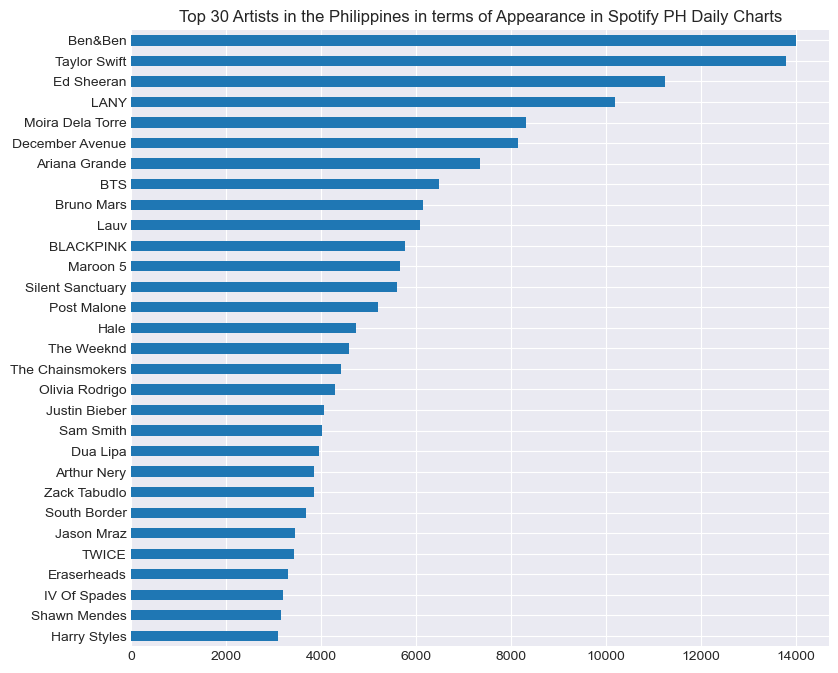

In [50]:
mode_30_df.plot( kind='barh', figsize=(9,8), title='Top 30 Artists in the Philippines in terms of Appearance in Spotify PH Daily Charts').invert_yaxis()

The graph above shows a data visualization of the top 30 artists in terms of their frequency in appearing in the Top 200 Spotify PH daily charts from 01/01/2017 to 31/03/2017. As observed, `Ben & Ben` are the mode artist of this dataset, having 14003 appearances in the daily charts throughout the entire duration of the data collection.

In [55]:
benandben_tracks_count_df = charts_df[charts_df['artist'] == 'Ben&Ben']['track_name'].value_counts()
benandben_tracks_count_df

Kathang Isip                                                1929
Leaves                                                      1887
Maybe The Night                                             1842
Pagtingin                                                   1429
Araw-Araw                                                   1299
Sa Susunod na Habang Buhay                                  1128
Make It With You                                            1069
Lifetime                                                     592
Masyado Pang Maaga                                           447
Ride Home                                                    360
Paninindigan Kita                                            336
Pasalubong - feat. Moira Dela Torre                          317
Di Ka Sayang                                                 225
Nakikinig Ka Ba Sa Akin                                      206
The Ones We Once Loved                                       182
Leaves (feat. Young K)   

In [56]:
print("Total Count: " + str(benandben_tracks_count_df.sum()))

Total Count: 14003


From the table above that shows the frequency of each song made by `Ben & Ben` in the dataset, it can be seen that their song, `Kathang Isip` appeared in the charts for 1929 times in the charts, out of the 2280 days this data collection process was held.

## Question 2:
### Is there a correlation between these features of a song, namely:

- **`danceability`**: describes how suitable a song is for dancing based on musical elements present in the track specifically the tempo, rhythm stability, beat strength, and overall regularity. It has a value between 0 being the least danceable to 1 being the most danceable.
- **`energy`**: a value between 0 to 1 representing the measure of intensity and activity.
- **`loudness`**: overall (average) loudness of a track in decibels. Values typically range between -60 to 0 db
- **`mode`**: a value of either 0 or 1 indicating the modality of a track, 0 represents *minor* and 1 represents *major*
- **`speechiness`**: a value representing the presence of spoken words detected in a track. It ranges between 0 to 1 where tracks that are exclusively speech-like has a value that is closer to 1.0
- **`acousticness`**: a value between 0 to 1 representing the confidence that the track is acoustic. 1.0 represents high confidence that the track is acoustic
- **`instrumentalness`**: a value between 0 to 1 representing a prediction whether the track has no vocals. The closer the value is to 1.0, the greater likelihood that it has no vocal content.
- **`liveness`**: a value between 0 to 1 representing the presence of an audience detected in the recording. A value above 0.8 provides a strong likelihood that the track is live (performed and recorded in front of an audience).
- **`valence`**: a value between 0 to 1 representing the positiveness conveyed by a track. A value closer to 1.0 represents a positive track (e.g. happy or cheerful) and a value closer to 0.0 represents a negative track (e.g. sad or depressing)
- **`tempo`**: a value representing the overall tempo (speed or pace) of a track in beats per minute (BPM). [Source](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

### with the total number of recorded streams the song has during the timespan of the dataset.

To answer this question, each given variables from the list is correlated with popularity, and determine its relationship, whether it is positive or negative. 

This will help in answering the research question as it is useful for preliminary insights between the one dimensional relationship of a song feature and its overall popularity. The correlation matrix highlights the strong relationships, and can be used as basis for features in the beginning of answering the research question.

In [102]:
corr_df = charts_tracks_df[['track_id', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
corr_df

,track_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,-6.209,0.0454,0.1960,0.000000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,0.358,0.557,-7.398,0.0590,0.6950,0.000000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,-5.599,0.0338,0.4140,0.000000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,0.662,0.586,-8.821,0.0307,0.0970,0.002720,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,0.783,0.623,-6.126,0.0800,0.3380,0.000000,0.0975,0.447,100.048
...,...,...,...,...,...,...,...,...,...,...
4763,4hbU7BVioG3WnoRNEy5YUf,0.800,0.792,-4.953,0.0529,0.0119,0.000001,0.0495,0.455,102.000
4764,6TKDFOO6Rv6VuB9PxcXQO3,0.744,0.572,-9.542,0.2680,0.1520,0.000000,0.0949,0.535,156.071
4765,69CrOS7vEHIrhC2ILyEi0s,0.841,0.384,-7.684,0.0351,0.0236,0.000002,0.0735,0.597,123.961
4766,2YXswOX5aKv6OHRKUcAMLQ,0.779,0.646,-5.884,0.0388,0.0260,0.000027,0.0943,0.628,110.048


In the table above, we can see the values corresponding to a song's features. From the data cleaning part, all duplicates and tracks with NaN were already cleaned. However, the total number of streams per song has not been obtained yet. To do this:

1. Obtain the total streams of each song by aggregating the streams of each track in `charts_df`.
2. This value can now be appended as a new series in `corr_df` by using libraries. 

# ----------------------------------IGNORE FROM THIS PART------------------------------------

In [103]:
corr_df.corr()

C:\Users\josha\AppData\Local\Temp\ipykernel_20620\3338937161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df.corr()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.254389,0.256804,0.181465,-0.288596,-0.047463,-0.048214,0.449484,-0.116722
energy,0.254389,1.000000,0.780283,0.130727,-0.680165,-0.054824,0.133739,0.426256,0.105928
loudness,0.256804,0.780283,1.000000,0.041490,-0.568272,-0.152514,0.049051,0.337836,0.065745
speechiness,0.181465,0.130727,0.041490,1.000000,-0.111491,-0.028183,0.059938,0.128878,0.096596
acousticness,-0.288596,-0.680165,-0.568272,-0.111491,1.000000,0.047445,-0.066700,-0.233875,-0.090414
instrumentalness,-0.047463,-0.054824,-0.152514,-0.028183,0.047445,1.000000,-0.007590,-0.084506,-0.025627
liveness,-0.048214,0.133739,0.049051,0.059938,-0.066700,-0.007590,1.000000,0.023353,-0.006704
valence,0.449484,0.426256,0.337836,0.128878,-0.233875,-0.084506,0.023353,1.000000,0.038085
tempo,-0.116722,0.105928,0.065745,0.096596,-0.090414,-0.025627,-0.006704,0.038085,1.000000


Before creating a correlation matrix for a summary of the derived table above, we can first gain insights on the correlation of each song feature with the popularity.

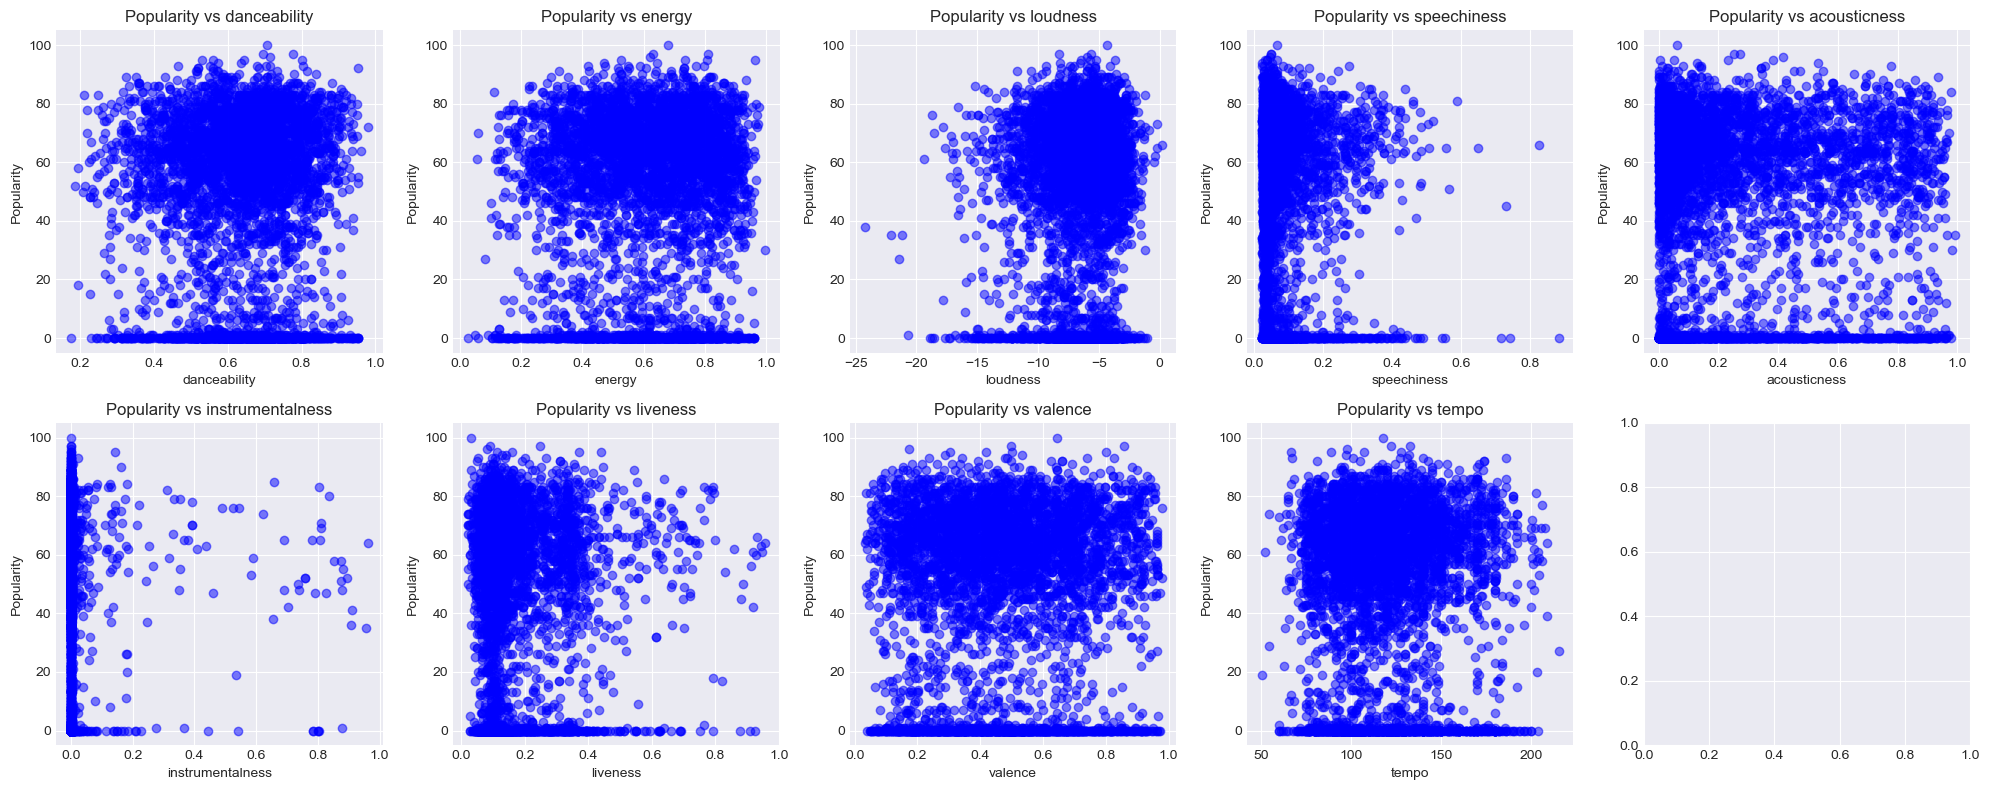

In [94]:
song_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, var in enumerate(song_features):
    row = i // 5  # Calculate the row index
    col = i % 5  # Calculate the column index
    axes[row, col].scatter(charts_tracks_df[var], charts_tracks_df['popularity'], alpha=0.5, color='b')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Popularity')
    axes[row, col].set_title('Popularity vs ' + var)

plt.tight_layout()
plt.show()

After visualizing each relationship between the song features and personality, the correlation matrix is made.

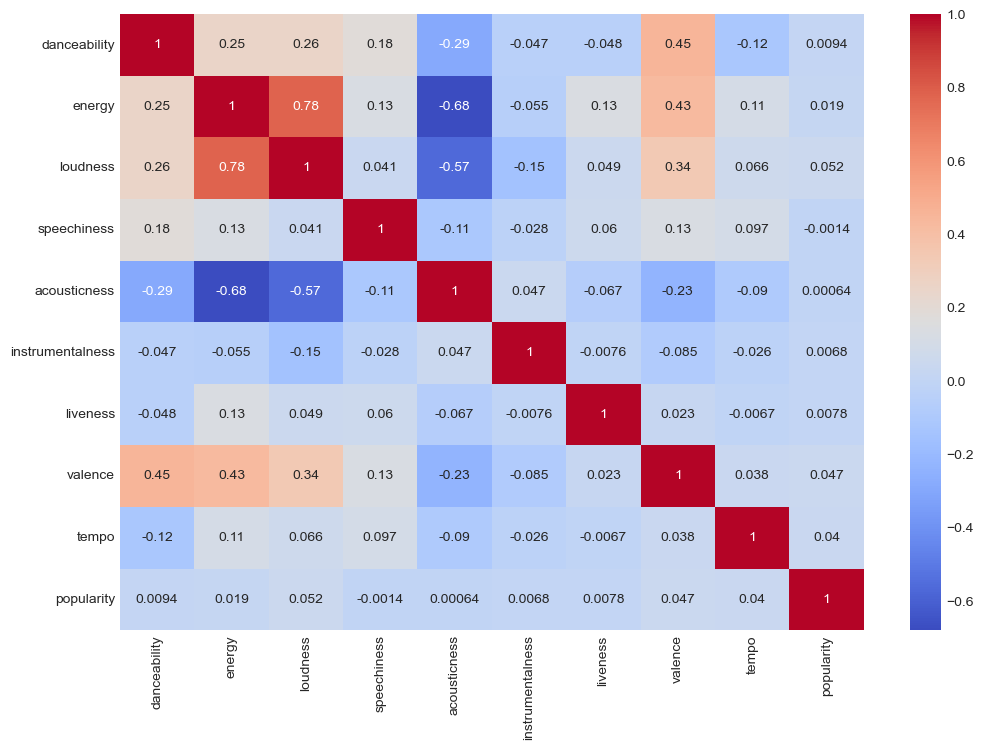

In [99]:
#create a heatmap of corr_df
plt.figure(figsize=(12,8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.show()


From the provided visualizations itself, it can be determined that 

# ----------------------------------IGNORE FROM THIS PART------------------------------------

## Question 3:



## Question 4:

# Research Question

## Ideas:
- Association rule mining with song features and popularity (patterns of features that exhibit high popularity, frequency of certain high/low values appearing more frequently in the top charts)
    - **eg: high danceability value and low acousticness => high popularity?**

    
    - not sure if ARM works with numerical values so we could use binning and represent values in categorial form, example:
        | Energy | Range |
        |-------------|----------|
        | High Energy | 0.7 - 1.0|
        | Medium Energy | 0.4 - 0.6 |
        | Low Energy | 0.0 - 0.3 |
        
        which turns our numerical data into categorial for each track features for ARM.

        then use one hot encoding?

        example:
        Track |High Energy    |	Medium Energy| Low Energy
        |-----|---------------|-------------|-------------|
        A|1|	0|0
        B|0|	1|0
        C|0|	0|1